**CIND 860: Advanced Data Analytics Project**

**Section: DJH**

**Student Name: Muhammad Zaka Shaheryar**

**Student #: 500648718**

**Supervisor Name: Tamer Abdou**

**Date of Submission: March 14th, 2024**

**Project Title: Analysis of Sign language MNIST using Deep learning**

**Project Deliverable: Initial Code and Result**

**Github Link: https://github.com/Zaka123456/CIND860**




**Link to dataset**

https://www.kaggle.com/datasets/datamunge/sign-language-mnist

**Dataset Description**

American Sign Language(ASL) is a complete, natural language that has the same linguistic properties as spoken languages, with grammar that differs from English. ASL is expressed by the movement of hands and faces. This dataset consists of 27,455 images of hand signs, each image is of 28 x 28 size and in grayscale format. The dataset format is patterned to match closely with the classic MNIST. Images in the dataset belong to a label from 0–25 representing letters from A-Z(but no cases of 9=J or 25=Z as they involve hand motion). The training data(27,455 cases) and the test data(7,172 cases) are approximately half the size of standard MNIST but otherwise similar to a header row of the label, pixel1, pixel….pixel784. The original hand gesture image data represented multiple users repeating gestures against different backgrounds. The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest.









**Data Dictionary**

**label:** Numeric target column of number 0-25 (excluding 9 and 25)

**label_alpha:** categoriacal target column of alphabets A-Z (excluding J and Z)

**Libraries**

In [ ]:
!pip install pydantic
!pip install PyYAML
!pip install jinja2
!pip install visions
!pip install htmlmin
!pip install phik
!pip install requests
!pip install tqdm
!pip install seaborn
!pip install multimethod
!pip install statsmodels
!pip install typeguard
!pip install imagehash
!pip install wordcloud
!pip install dacite
!pip install numba
!pip install np_utils
!pip install keras-vis
!pip install keras-utils
!{sys.executable} -m pip install -U ydata-profiling
!jupyter nbextension enable --py widgetsnbextension

In [2]:
# Import the necessary modules
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sys
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # Force TF to use only the CPU
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import fashion_mnist
#from keras.utils import np_utils
#from keras.utils.vis_utils import plot_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
print(tf.__version__)
print(keras.__version__)

**Data Preparation**

In [ ]:
# Please note: Due to the size of the dataset, it can take anywhere from 10-15 minutes to fully upload the train dataset (around 27,000 rows)

# Uploading train dataset
from google.colab import files
file_upload_train = files.upload()

In [ ]:
# Uploading test dataset
from google.colab import files
file_upload_test = files.upload()

In [ ]:
sign_mnist_train_file = "sign_mnist_train.csv"
data_sign_train = pd.read_csv(sign_mnist_train_file, sep = ',', header=0)

sign_mnist_test_file = "sign_mnist_test.csv"
data_sign_test = pd.read_csv(sign_mnist_test_file, sep = ',', header=0)

display(data_sign_train)
display(data_sign_test)

In [ ]:
print(data_sign_train.shape)
print(data_sign_test.shape)
print(len(data_sign_train))

In [8]:
print(data_sign_train.min())
print(data_sign_test.max())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64
label        24
pixel1      255
pixel2      255
pixel3      255
pixel4      255
           ... 
pixel780    255
pixel781    255
pixel782    255
pixel783    255
pixel784    255
Length: 785, dtype: int64


In [ ]:
print(type(data_sign_train))
print(type(data_sign_test))

In [ ]:
print(data_sign_train['label'])

In [ ]:
data_sign_train['label'].describe()

In [ ]:
data_sign_train['label'].info()

In [ ]:
display(data_sign_train['label'].unique())

In [14]:
num_to_cat = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6:'G', 7:'H', 8:'I', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y'}

In [15]:
# Convert numerical labels to categorical labels for train set
categorical_labels = [num_to_cat[label] for label in data_sign_train['label']]

In [ ]:
print(categorical_labels)

In [17]:
data_sign_train['label_alpha'] = categorical_labels

In [18]:
data_sign_train['label_alpha'] = data_sign_train['label_alpha'].astype('category')

In [19]:
train_2 = data_sign_train

In [20]:
# Convert numerical labels to categorical labels for test set
categorical_labels = [num_to_cat[label] for label in data_sign_test['label']]

In [21]:
data_sign_test['label_alpha'] = categorical_labels

In [22]:
data_sign_test['label_alpha'] = data_sign_test['label_alpha'].astype('category')

In [23]:
display(train_2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label_alpha
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,206,206,206,204,203,202,D
1,6,155,157,156,156,156,157,156,158,158,...,149,128,87,94,163,175,103,135,149,G
2,2,187,188,188,187,187,186,187,188,187,...,201,200,199,198,199,198,195,194,195,C
3,2,211,211,212,212,211,210,211,210,210,...,234,233,231,230,226,225,222,229,163,C
4,13,164,167,170,172,176,179,180,184,185,...,105,105,108,133,163,157,163,164,179,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,165,99,77,52,200,234,200,222,225,N
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,196,195,195,195,194,X
27452,18,174,174,174,174,174,175,175,174,173,...,196,209,208,206,204,203,202,200,200,S
27453,17,177,181,184,185,187,189,190,191,191,...,56,27,58,102,79,47,64,87,93,R


In [24]:
test_2 = data_sign_test

In [ ]:
display(test_2)

In [ ]:
data_sign_train['label_alpha'].info()

In [ ]:
data_sign_train['label_alpha'].describe()

In [ ]:
data_sign_train['label_alpha'].unique()

In [ ]:
data_sign_test['label_alpha'].unique()

In [ ]:
data_sign_train.columns

In [ ]:
data_sign_train.info()

In [31]:
data_sign_train['label_alpha'] = data_sign_train['label_alpha'].astype(str)

**Expolatory Data Analysis**

In [ ]:
# Filter method # start from here

# Load the train dataset from the CSV file
sign_train_file = "sign_mnist_train.csv"
data_sign_train = pd.read_csv(sign_train_file, sep=',', header=0)

# Separating the features (pixels - independent variables) and the target variable (label)
X_train = data_sign_train.iloc[:, 1:784] # Features
y_train = data_sign_train['label'].iloc[:]   # dependent variable


# Calculate Chi-square scores and select top 25% pixels
selector = SelectKBest(chi2, k=int(X_train.shape[1] * 0.25))
X_train_filtered = selector.fit_transform(X_train, y_train)

# Calculate the threshold for the top 25%
threshold = np.percentile(selector.scores_, 75)

# Create a dataframe with pixel indices and their importance scores
df_importance = pd.DataFrame({
    'Pixel Index': range(X_train.shape[1]),
    'Importance': selector.scores_
})

# Filter pixels above the threshold
df_importance = df_importance[df_importance['Importance'] >= threshold]

# Display the top n pixels
n = 25  # Number of top pixels to display
df_importance = df_importance.sort_values(by='Importance', ascending=False)
display(df_importance.head(n))

In [ ]:
# Hybrid method (took 11-14 min)
# Use the filtered pixels as the subset
model = LogisticRegression()
X_train_subset = X_train_filtered

# Select top 25% pixels from the subset based on feature importance
rfe = RFE(estimator=model, n_features_to_select=int(X_train_subset.shape[1] * 0.25))
X_train_hybrid = rfe.fit_transform(X_train_subset, y_train)

In [ ]:
# Load the train dataset from the CSV file
sign_train_file = "sign_mnist_train.csv"
data_sign_train = pd.read_csv(sign_train_file, sep=',', header=0)

# Separating the features (pixels - independent variables) and the target variable (label)
X_train = data_sign_train.iloc[:, 1:]  # Features (top 20 pixels)
y_train = data_sign_train.iloc[:, 0]   # dependent

# Creating a Random Forest Classifier
rf_classifier_train = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier_train.fit(X_train, y_train)

# Getting feature importances from the Random Forest model
feature_importances = rf_classifier_train.feature_importances_

# Using the top 20 features to select
n_top_features = 20

# Getting the indices of the top pixels
top_indices = feature_importances.argsort()[-n_top_features:]

# Selecting the top 20 of all the ranked pixels
selected_features = X_train.columns[top_indices]
selected_feature_importances = feature_importances[top_indices]

# Creating a DataFrame for the top 20 pixels and their importances
feature_df_train = pd.DataFrame({
    'Features': selected_features,
    'Importance': selected_feature_importances})

# Sorting the DataFrame by importance in descending order (from largest to smallest - top 20)
feature_df_train = feature_df_train.sort_values(by='Importance', ascending=False)

# Reseting the index to start from 1 instead of 0 (this command was used because it originally ranked from 0-19, instead of 1-20)
feature_df_train.index = range(1, n_top_features + 1)

# Displaying the top 20 ranked pixels and their importance values
print(feature_df_train)

Hybrid technique is choosen for project for now, bit it will be checked in later stage of project if it is better than filter technique. Also to avoid ssytem crashing small number of selected features is taken, therefore n is taken as 20.

In [ ]:
# Loading train dataset from the CSV file
sign_train_file = "sign_mnist_train.csv"
data_sign_train = pd.read_csv(sign_train_file, sep=',', header=0)

# Separating the features (pixels) and the target variable (label)
X_train = data_sign_train.iloc[:, 1:]  # Features (top 20 pixels)
y_train = data_sign_train.iloc[:, 0]   # Labels

# Creating a Random Forest Classifier
rf_classifier_train = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier_train.fit(X_train, y_train)

# Getting feature importances from the Random Forest model
feature_importances = rf_classifier_train.feature_importances_

# Creating a DataFrame to display pixel importance values
pixel_importance_df_train = pd.DataFrame({
    'Pixel': X_train.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame by importance in descending order and select the top 20 pixels
top_20_pixels_train = pixel_importance_df_train.nlargest(20, 'Importance')

# Creating a DataFrame to store the data for the top 20 pixels
top_20_pixels_data_train = X_train[top_20_pixels_train['Pixel']].copy()  # Make a copy to avoid the SettingWithCopyWarning error message

top_20_pixels_data_train = pd.concat([y_train, top_20_pixels_data_train], axis=1)

# Saving the DataFrame to a CSV file
top_20_pixels_data_train.to_csv("top_20_pixels_with_labels_train.csv", index=False)

In [ ]:
display(top_20_pixels_data_train)

In [ ]:
# Panda Profiling report for the TRAIN SET (about 20,000 rows)
!pip install ydata_profiling
from ydata_profiling import ProfileReport
top_20_pixels_data_train = pd.read_csv("top_20_pixels_with_labels_train.csv")
ydata_profiling_train = ProfileReport(top_20_pixels_data_train)

# Saving the report to an HTML file
ydata_profiling_train.to_file("top_20_pixels_train_report.html")

In [ ]:
# The following command generates the pandaprofiling report for the train set for top 20 pixels
ydata_profiling_train

In [ ]:
# Replicating the top 20 pixels from the train set to the test set

# Loading the test dataset from the CSV file
sign_test_file = "sign_mnist_test.csv"
data_sign_test = pd.read_csv(sign_test_file, sep=',', header=0)

# Selecting the same top 20 features (pixels) as in the training set
selected_features = ['pixel246', 'pixel239', 'pixel302', 'pixel266', 'pixel210',
                     'pixel546', 'pixel265', 'pixel353', 'pixel321', 'pixel211',
                     'pixel245', 'pixel520', 'pixel355', 'pixel327', 'pixel465',
                     'pixel238', 'pixel575', 'pixel326', 'pixel217', 'pixel212']

# Creating a new DataFrame with the selected features and labels
data_sign_test_selected = data_sign_test[['label'] + selected_features]

# Save the selected data to a new CSV file
data_sign_test_selected.to_csv("top_20_pixels_with_labels_test.csv", index=False)

In [ ]:
# Panda Profiling report for the TEST SET (10,000 rows)

from ydata_profiling import ProfileReport
top_20_pixels_data_test = pd.read_csv("top_20_pixels_with_labels_test.csv")
ydata_profiling_test = ProfileReport(top_20_pixels_data_test)

# Saving the report to an HTML file
ydata_profiling_test.to_file("top_20_pixels_test_report.html")

In [ ]:
# The following command generates the pandaprofiling report for the replicated test set for top 20 pixels
ydata_profiling_test

The Pandas Profiling Report for combined dataset provides a comprehensive analysis of a dataset with 34,627 observations and 21 variables, detailing aspects like missing data, duplicates, and feature correlations. Key findings include a 0% missing data ratio, less than 0.1% duplicate rows, and high correlations among certain pixel values, indicating redundancy or strong dependencies between features. The analysis also identifies outliers and zeros in specific pixel values, crucial for preprocessing steps in machine learning projects.The report's insights on attribute types, outliers, and the dataset's memory footprint can guide data preprocessing and feature engineering, enhancing model accuracy and efficiency

**Predictive Modelling**

**Research Question (RQ)**

1
How does accuracy, computational efficiency, and stability of CNN compare to traditional machine learning techniques such as Random Forest, SVM, XGBoost or K-NN in classifying ASL images?


2
Which neural network out of MLP, AlexNet, MobileNet, VGG 16, LeNet exhibits the greatest efficiency in classifying ASL images taking into account accuracy and computational resources?

3
When compared to Naive Bayes (NB), how effective is TAN or FAN at identifying the true cause of categorial target label of english alphabets in context of Sign language MNIST dataset?

In [ ]:
# The following code was used with the traditional CNN-simple model for the top 20 pixels based on importance (on the test dataset)

import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Loading the dataset containing 'label' and the top 20 pixels from the combined dataset (70,000 rows)
#data_sign_test_selected = pd.read_csv("combined_top_20_pixels_with_labels.csv")
data_sign_test_selected = top_20_pixels_data_train
# Separating the features and target variable (label)
X = data_sign_test_selected.iloc[:, 1:]  # Features (top 20 pixels)
y = data_sign_test_selected["label"]   # dependent variable

# Reshaping the data to match a CNN input shape
X = X.values.reshape(X.shape[0], 20, 1, 1)

# Converting 'label' (dependent variable) to one-hot encoding
y = to_categorical(y)

In [ ]:
display(data_sign_test_selected)

In [ ]:
display(data_sign_test_selected[data_sign_test_selected.label == 13])
#data_sign_test_selected.info()

In [ ]:
#display(X)

In [ ]:
#display(y)

In [ ]:
# Building a simple CNN model with the basic parameters
simple_cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 1), activation='relu', input_shape=(20, 1, 1)),
    layers.MaxPooling2D((2, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(25, activation='softmax')  # 25 classes in the top 20 pixels (labelled from 0-24)
])

# Compiling & training the simple-cnn-model
simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_cnn_model.fit(X, y, epochs=10, batch_size=64)

Epoch 1/10
429/429 [==============================] - 3s 5ms/step - loss: 4.8094 - accuracy: 0.2679
Epoch 2/10
429/429 [==============================] - 2s 5ms/step - loss: 1.8766 - accuracy: 0.4499
Epoch 3/10
429/429 [==============================] - 3s 7ms/step - loss: 1.4670 - accuracy: 0.5531
Epoch 4/10
429/429 [==============================] - 2s 6ms/step - loss: 1.1712 - accuracy: 0.6346
Epoch 5/10
429/429 [==============================] - 5s 12ms/step - loss: 0.9266 - accuracy: 0.7067
Epoch 6/10
429/429 [==============================] - 5s 11ms/step - loss: 0.7195 - accuracy: 0.7721
Epoch 7/10
429/429 [==============================] - 3s 7ms/step - loss: 0.5325 - accuracy: 0.8354
Epoch 8/10
429/429 [==============================] - 2s 5ms/step - loss: 0.3904 - accuracy: 0.8850
Epoch 9/10
429/429 [==============================] - 2s 5ms/step - loss: 0.2751 - accuracy: 0.9232
Epoch 10/10
429/429 [==============================] - 2s 4ms/step - loss: 0.2028 - accuracy: 0.94

In [ ]:
# Evaluateing the simple-cnn-model
test_loss, test_accuracy = simple_cnn_model.evaluate(X, y)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

858/858 [==============================] - 3s 3ms/step - loss: 0.1968 - accuracy: 0.9422
Test accuracy: 94.22%


In [ ]:
# The following code was used with the Random Forest model (with 10, 50 and 100 trees) for the top 20 pixels based on importance
# (on the test set which replicated the top 20 pixels on the training set)

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading the dataset containing 'label' and the top 20 pixels from the combined dataset
data_sign_test_selected = pd.read_csv("top_20_pixels_with_labels_train.csv")

# Separating the features and target variable (label)
X = data_sign_test_selected.iloc[:, 1:]  # Features (top 20 pixels)
y = data_sign_test_selected['label']   # Dependent variable

# Splitting the top 20 pixels combined data into a training and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Defining a list of n_estimators values to test (for 3 different values of trees)
n_estimators_values = [10, 50, 100]

for n_estimators in n_estimators_values:
    # Creating a Random Forest Classifier with the current number of trees
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    # Training the classifier on the training set
    rf_classifier.fit(X_train, y_train)
    # Making predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculating and displaying the test accuracy for the 3 different random forest tree values
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy (n_estimators={n_estimators}): {accuracy * 100:.2f}%')

Test accuracy (n_estimators=10): 93.81%
Test accuracy (n_estimators=50): 97.40%
Test accuracy (n_estimators=100): 97.85%


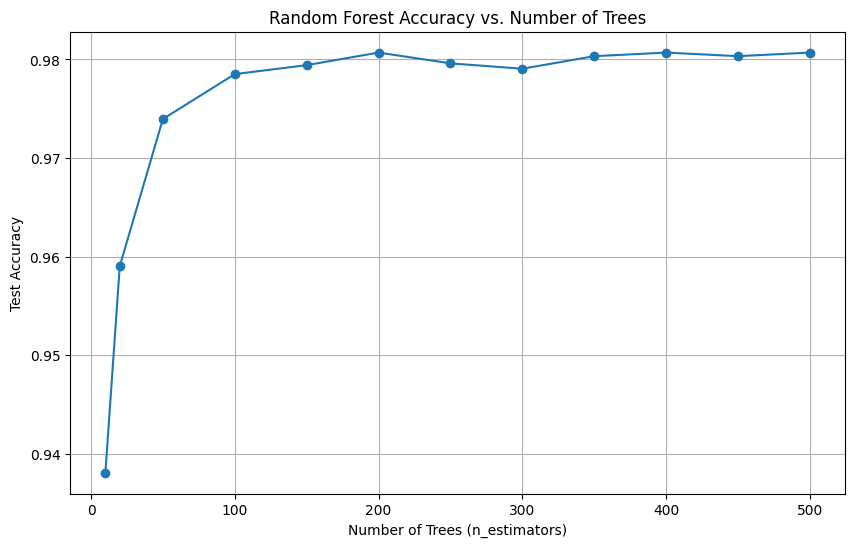

In [ ]:
# Random forest graph

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Loading the dataset containing 'label' and the top 20 pixels from the combined dataset
data_sign_test_selected = pd.read_csv("top_20_pixels_with_labels_train.csv")

# Separating the features and target variable (label)
X = data_sign_test_selected.iloc[:, 1:]  # Features (top 20 pixels)
y = data_sign_test_selected['label']   # Dependent variable

# Splitting the top 20 pixels combined data into a training and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a list of n_estimators values to test
n_estimators_values = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Lists to store accuracy values for each n_estimators
accuracies = []

# Loop through different n_estimators values and calculate accuracy
for n_estimators in n_estimators_values:
    # Creating a Random Forest Classifier with the current number of trees
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    # Training the classifier on the training set
    rf_classifier.fit(X_train, y_train)
    # Making predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculating and storing the test accuracy for each n_estimators
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracies, marker='o')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your combined dataset (70,000 rows, 21 columns) containing 'label' and the top 20 pixels
data_sign_combined = pd.read_csv("top_20_pixels_with_labels_train.csv")

# Separate the features (pixels) and the target variable (label)
X = data_sign_combined.iloc[:, 1:]  # Features (top 20 pixels)
y = data_sign_combined['label']     # Dependent variable

# Split the data into a training and test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a list of n_estimators values to test
n_estimators_values = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]  # You can extend this list

# Create dictionaries to store the results
accuracies = {}

for n_estimators in n_estimators_values:
    # Create a Random Forest Classifier with the current number of trees
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    # Train the classifier on the training set
    rf_classifier.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate the test accuracy for the current number of trees
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[n_estimators] = accuracy

# Display the accuracies for each n_estimators value
for n_estimators, accuracy in accuracies.items():
    print(f'Test accuracy (n_estimators={n_estimators}): {accuracy * 100:.2f}%')

Test accuracy (n_estimators=10): 93.81%
Test accuracy (n_estimators=20): 95.90%
Test accuracy (n_estimators=50): 97.40%
Test accuracy (n_estimators=100): 97.85%
Test accuracy (n_estimators=150): 97.94%
Test accuracy (n_estimators=200): 98.07%
Test accuracy (n_estimators=250): 97.96%
Test accuracy (n_estimators=300): 97.91%
Test accuracy (n_estimators=350): 98.03%
Test accuracy (n_estimators=400): 98.07%
Test accuracy (n_estimators=450): 98.03%
Test accuracy (n_estimators=500): 98.07%


In [ ]:
# The following code was used with the SVM model for the top 20 pixels based on Importance (on the test set which replicated the
# top 20 pixels on the training set)

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading the dataset containing 'label' and the top 20 pixels from the combined dataset
data_sign_test_selected = pd.read_csv("top_20_pixels_with_labels_train.csv")

# Separating the features and target variable (label)
X = data_sign_test_selected.iloc[:, 1:]  # Features (top 20 pixels)
y = data_sign_test_selected['label']   # Dependent variable

# Splitting the data into a training and test set (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating an SVM classifier
svm_classifier = SVC()

# Training the SVM classifier on the training set
svm_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculating and displaying the test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Test accuracy: 92.33%


**Result and Discussion**

Regarding Q1, Random forest show better accuracy (98%) compared to CNN (94%). this will be checked together with other aspect of evaluation.

Work on Q2 and Q3 is process, so it code will be provide in final report.